# Bernoulli Gambler Bandit

## Beta Distribution

In [1]:
%matplotlib inline

In [2]:
from scipy.stats import beta
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

Calculate a few first moments:

In [3]:
#suppose a grid of k_x x k_y machines
k_x = 3
k_y = 3

#then k slot machines
k = k_x * k_y

#samples
arr_p_size = 100
arr_s_size = 2000

#arr_p = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), num_points)
arr_p = np.linspace(0, 1, arr_p_size)
arr_q = 1 - arr_p

# n is the nuber of trials for each slot
arr_n = np.array(
    [[0, 4, 50],
     [1, 5, 50],
     [1, 5, 50]])

# x is the nuber of successes
arr_x = np.array(
    [[0, 2, 25],
     [0, 1, 10],
     [1, 4, 40]])

# y is the nuber of fails
arr_y = arr_n - arr_x

#prior = [1, 1]

#alpha and beta parameters considering prior
arr_alpha = arr_x+1
arr_beta = arr_y+1

#probability of ruin
ruin_function = lambda p, q, b : (q/p)**b if p>0.5 else 1

#beta distribution
beta_function = lambda n, x, y, p, q : (factorial(n+1) / (factorial(x) * factorial(y))) * p**x * q**y
#beta_function = lambda x, y, p : _beta_function(x+y, x, y, p, 1-p)

#estimated probability of ruin
ruin_est_function = lambda n, x, y, p, q, b : ruin_function(p, q, b) * beta_function(n, x, y, p, q)

#budget
b = 1
ruin_prob = np.zeros((arr_p_size))
for p in range(arr_p_size):
    ruin_prob[p] = ruin_function(arr_p[p], arr_q[p], b)
#ruin_prob = np.array([ruin_function(arr_p[p], arr_q[p], b) for p in range(arr_p_size)])

#prepare the probability density function (pdf):
#prepare the cumulative probability function (cdf):
#calculate beta moments
#generate random numbers drawn from the distribution:
pdf = np.zeros((k_x, k_y, arr_p_size))
pdf_hand = np.zeros((k_x, k_y, arr_p_size))
cdf = np.zeros((k_x, k_y, arr_p_size))
mean = np.zeros((k_x, k_y))
peak = np.zeros((k_x, k_y))
nvsk = np.zeros((k_x, k_y, 4))
samples = np.zeros((k_x, k_y, arr_s_size))
ruin_prob_est = np.zeros((k_x, k_y, arr_p_size))
ruin_prob_est_hand = np.zeros((k_x, k_y, arr_p_size))
for i in range(k_x):
    for j in range(k_y):
        pdf[i][j] = beta.pdf(arr_p, arr_alpha[i][j], arr_beta[i][j])  
        for p in range(arr_p_size):
            pdf_hand[i][j][p] = beta_function(arr_n[i][j], arr_x[i][j], arr_y[i][j], arr_p[p], arr_q[p])
        cdf[i][j] = beta.cdf(arr_p, arr_alpha[i][j], arr_beta[i][j])  
        nvsk[i][j] = beta.stats(arr_alpha[i][j], arr_beta[i][j], moments='mvsk')  #mean, var, skew, kurt
        mean[i][j] = beta.mean(arr_alpha[i][j], arr_beta[i][j])
        peak[i][j] = arr_p[np.argmax(pdf[i][j])]
        samples[i][j] = beta.rvs(arr_alpha[i][j], arr_beta[i][j], size=arr_s_size)
        ruin_prob_est[i][j] = pdf[i][j] * ruin_prob
        ruin_prob_est_hand[i][j] = pdf_hand[i][j] * ruin_prob
        for p in range(arr_p_size):
            ruin_prob_est_hand[i][j][p] = ruin_est_function(arr_n[i][j], arr_x[i][j], arr_y[i][j], arr_p[p], arr_q[p], b)        


Show


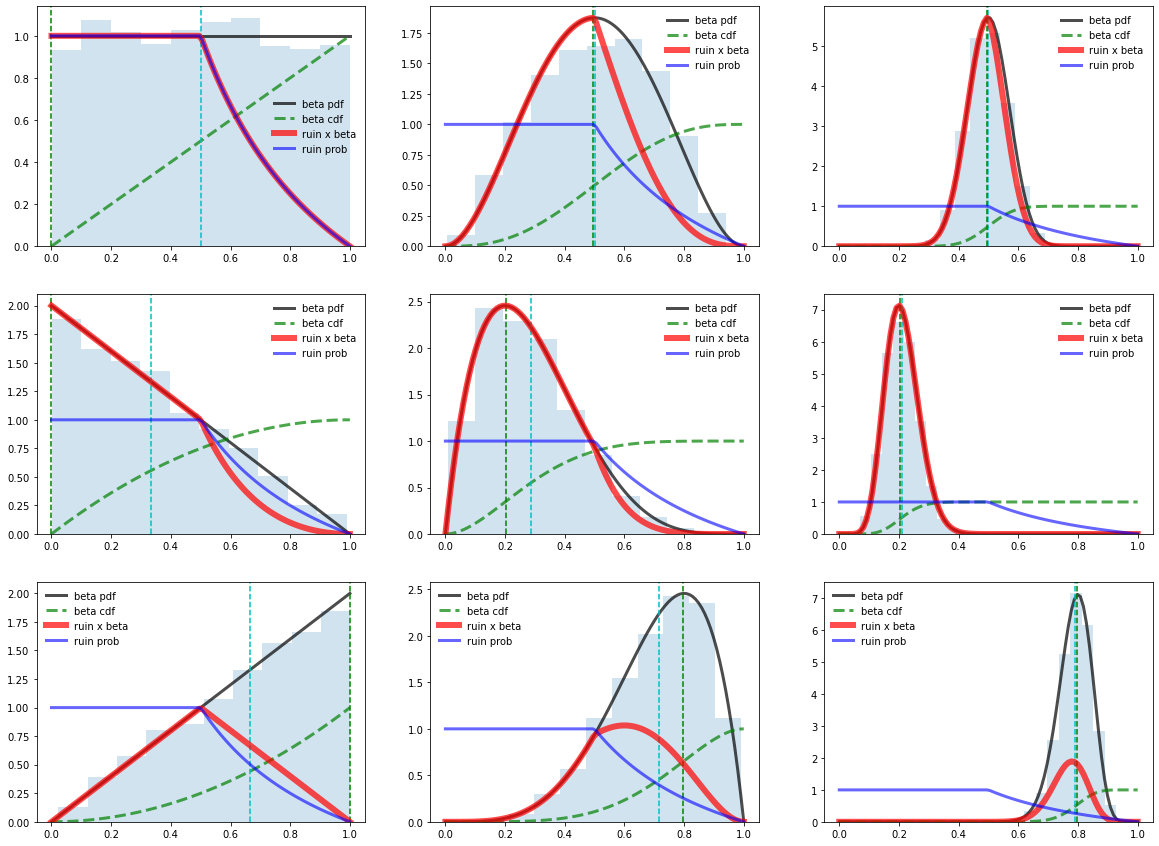

In [4]:
fig, ax = plt.subplots(k_x, k_y, figsize=(20, 15))

for i in range(k_x):
    for j in range(k_y):
        ax[i,j].hist(samples[i][j], density=True, histtype='stepfilled', alpha=0.2)
        ax[i,j].plot(arr_p, pdf[i][j] , 'k-', lw=3, alpha=0.7, label='beta pdf')
        ax[i,j].plot(arr_p, cdf[i][j] , 'g--', lw=3, alpha=0.7, label='beta cdf')
        ax[i,j].axvline(x=mean[i][j], color='c', linestyle='--')
        ax[i,j].axvline(x=peak[i][j], color='g', linestyle='--')
        ax[i,j].plot(arr_p, ruin_prob_est[i][j] , 'r-', lw=6, alpha=0.7, label='ruin x beta')
        #ax[i,j].plot(arr_p, pdf_hand[i][j] , 'k--', lw=10, alpha=0.3, label='beta hand pdf')
        #ax[i,j].plot(arr_p, ruin_prob_est_hand[i][j] , 'r--', lw=12, alpha=0.5, label='ruin x beta hand')
        ax[i,j].plot(arr_p, ruin_prob , 'b-', lw=3, alpha=0.6, label='ruin prob')
        ax[i,j].legend(loc='best', frameon=False)
        
plt.show()

# ??beta.cdf

Probability of Ruin

In [5]:
arr_b_size = 20
arr_b = range(arr_b_size)
ruin_prob = np.zeros((arr_p_size, arr_b_size))
for i in range(arr_p_size):
    for j in range(arr_b_size):
        ruin_prob[i][j] = (((1-arr_p[i])/arr_p[i])**arr_b[j]) if (arr_p[i]>0.5) else 1

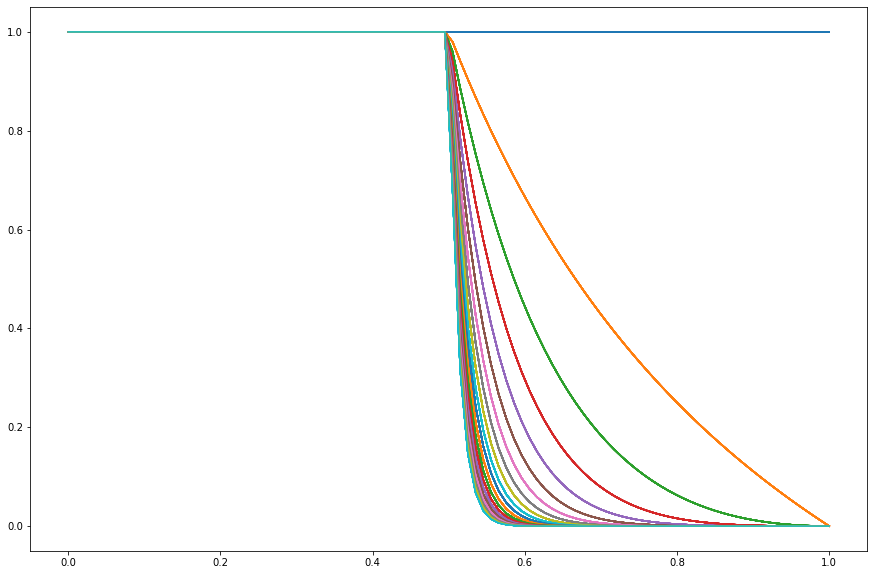

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

for j in range(arr_b_size):
    plt.plot(arr_p, ruin_prob , label='ruin probabilities')
      
plt.show()
